# Accessing trayectory data

First, import libraries

In [2]:
import numpy as np
import xarray as xr
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
Rtraj = xr.open_dataset('./Data/6901254/6901254_Rtraj.nc')

In [4]:
Rtraj

<xarray.Dataset>
Dimensions:                              (N_CYCLE: 66, N_HISTORY: 1043, N_MEASUREMENT: 4289, N_PARAM: 3)
Dimensions without coordinates: N_CYCLE, N_HISTORY, N_MEASUREMENT, N_PARAM
Data variables:
    DATA_TYPE                            object ...
    FORMAT_VERSION                       object ...
    HANDBOOK_VERSION                     object ...
    REFERENCE_DATE_TIME                  object ...
    DATE_CREATION                        object ...
    DATE_UPDATE                          object ...
    PLATFORM_NUMBER                      object ...
    PROJECT_NAME                         object ...
    PI_NAME                              object ...
    TRAJECTORY_PARAMETERS                (N_PARAM) object ...
    DATA_CENTRE                          object ...
    DATA_STATE_INDICATOR                 object ...
    PLATFORM_TYPE                        object ...
    FLOAT_SERIAL_NO                      object ...
    FIRMWARE_VERSION                     object ...
    WMO_INST_TYPE                        object ...
    POSITIONING_SYSTEM                   object ...
    JULD                                 (N_MEASUREMENT) datetime64[ns] ...
    JULD_STATUS                          (N_MEASUREMENT) object ...
    JULD_QC                              (N_MEASUREMENT) object ...
    JULD_ADJUSTED                        (N_MEASUREMENT) datetime64[ns] ...
    JULD_ADJUSTED_STATUS                 (N_MEASUREMENT) object ...
    JULD_ADJUSTED_QC                     (N_MEASUREMENT) object ...
    LATITUDE                             (N_MEASUREMENT) float64 ...
    LONGITUDE                            (N_MEASUREMENT) float64 ...
    POSITION_ACCURACY                    (N_MEASUREMENT) object ...
    POSITION_QC                          (N_MEASUREMENT) object ...
    CYCLE_NUMBER                         (N_MEASUREMENT) float64 ...
    CYCLE_NUMBER_ADJUSTED                (N_MEASUREMENT) float64 ...
    MEASUREMENT_CODE                     (N_MEASUREMENT) float64 ...
    AXES_ERROR_ELLIPSE_MAJOR             (N_MEASUREMENT) float32 ...
    AXES_ERROR_ELLIPSE_MINOR             (N_MEASUREMENT) float32 ...
    AXES_ERROR_ELLIPSE_ANGLE             (N_MEASUREMENT) float32 ...
    SATELLITE_NAME                       (N_MEASUREMENT) object ...
    PRES                                 (N_MEASUREMENT) float32 ...
    PRES_QC                              (N_MEASUREMENT) object ...
    PRES_ADJUSTED                        (N_MEASUREMENT) float32 ...
    PRES_ADJUSTED_QC                     (N_MEASUREMENT) object ...
    PRES_ADJUSTED_ERROR                  (N_MEASUREMENT) float32 ...
    TEMP                                 (N_MEASUREMENT) float32 ...
    TEMP_QC                              (N_MEASUREMENT) object ...
    TEMP_ADJUSTED                        (N_MEASUREMENT) float32 ...
    TEMP_ADJUSTED_QC                     (N_MEASUREMENT) object ...
    TEMP_ADJUSTED_ERROR                  (N_MEASUREMENT) float32 ...
    PSAL                                 (N_MEASUREMENT) float32 ...
    PSAL_QC                              (N_MEASUREMENT) object ...
    PSAL_ADJUSTED                        (N_MEASUREMENT) float32 ...
    PSAL_ADJUSTED_QC                     (N_MEASUREMENT) object ...
    PSAL_ADJUSTED_ERROR                  (N_MEASUREMENT) float32 ...
    JULD_DESCENT_START                   (N_CYCLE) datetime64[ns] ...
    JULD_DESCENT_START_STATUS            (N_CYCLE) object ...
    JULD_FIRST_STABILIZATION             (N_CYCLE) datetime64[ns] ...
    JULD_FIRST_STABILIZATION_STATUS      (N_CYCLE) object ...
    JULD_DESCENT_END                     (N_CYCLE) datetime64[ns] ...
    JULD_DESCENT_END_STATUS              (N_CYCLE) object ...
    JULD_PARK_START                      (N_CYCLE) datetime64[ns] ...
    JULD_PARK_START_STATUS               (N_CYCLE) object ...
    JULD_PARK_END                        (N_CYCLE) datetime64[ns] ...
    JULD_PARK_END_STATUS                 (N_CYCLE) object ...
    JULD_DEEP_DESCENT_EN

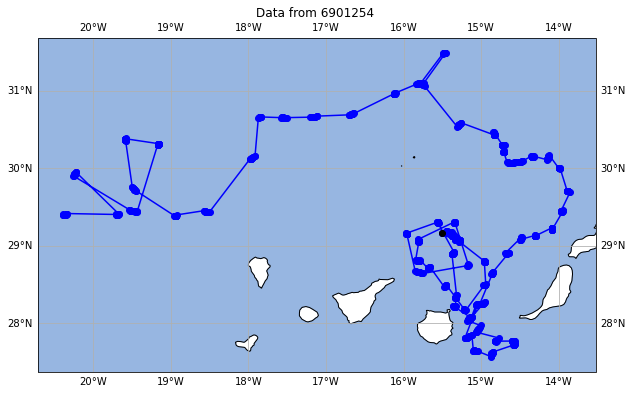

In [5]:
import cartopy.crs as ccrs
import cartopy
import numpy as np


fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(Rtraj.LONGITUDE,Rtraj.LATITUDE,'ob')
ax.plot(Rtraj.LONGITUDE[~np.isnan(Rtraj.LONGITUDE)],Rtraj.LATITUDE[~np.isnan(Rtraj.LATITUDE)],'-b')
ax.plot(Rtraj.LONGITUDE[0],Rtraj.LATITUDE[0],'ok')
ax.plot(Rtraj.LONGITUDE[-1],Rtraj.LATITUDE[-1],'sk')

ax.set_title(f"Data from {Rtraj.PLATFORM_NUMBER.values.astype(str)}")
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);

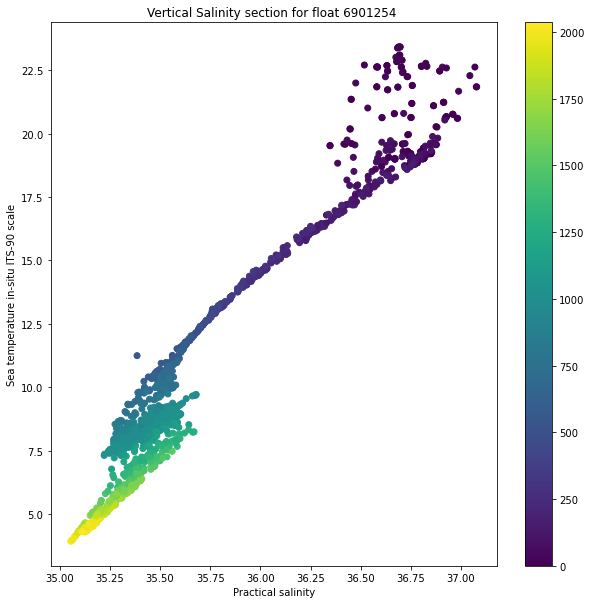

In [6]:
fig,ax = plt.subplots(figsize=(10,10))
sc=ax.scatter(Rtraj.PSAL,Rtraj.TEMP,c=Rtraj.PRES)
ax.set_title(f"Vertical Salinity section for float {Rtraj.PLATFORM_NUMBER.astype(str).values}")
ax.set_xlabel(f"{Rtraj.PSAL.long_name}")
ax.set_ylabel(f"{Rtraj.TEMP.long_name}")
fig.colorbar(sc);

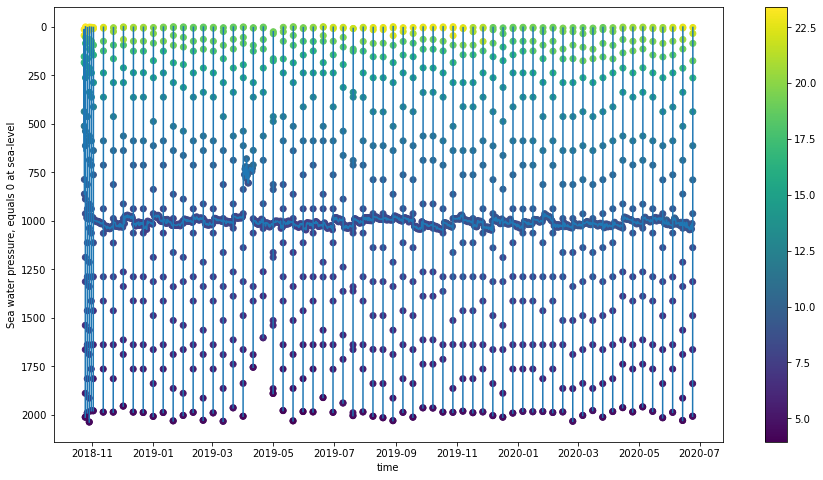

In [7]:
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(Rtraj.JULD,Rtraj.PRES,'-')
sc=ax.scatter(Rtraj.JULD,Rtraj.PRES,c=Rtraj.TEMP)
ax.set_xlabel(f"{Rtraj.JULD.standard_name}")
ax.set_ylabel(f"{Rtraj.PRES.long_name}")
ax.invert_yaxis()
fig.colorbar(sc);

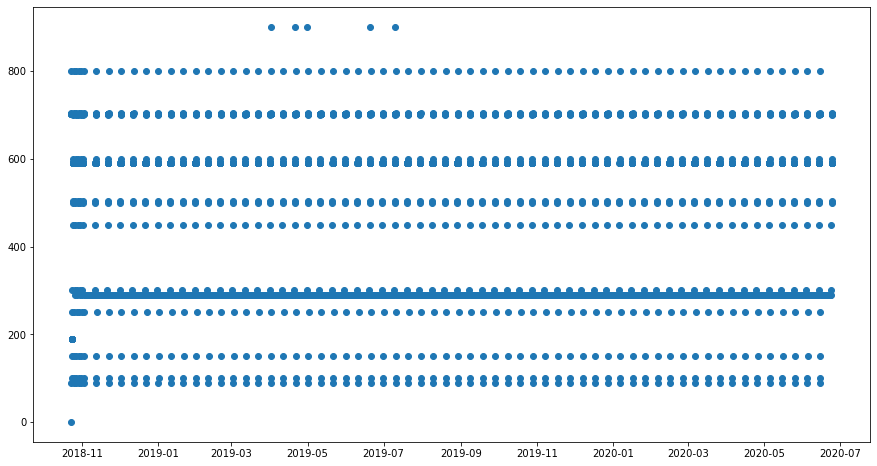

In [8]:
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(Rtraj.JULD,Rtraj.MEASUREMENT_CODE,'o');